In [ ]:
print("Hello")

Hello


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from captum.attr import LayerGradCam, GuidedGradCam, LayerAttribution
from captum.attr import visualization as viz
from PIL import Image

In [ ]:
# ResNet18
model = torchvision.models.resnet18(pretrained=True)
model.eval()
print("resnet18")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


resnet18


In [ ]:
# Load and preprocess an image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

img = Image.open("/content/image.jpg")
input_img = transform(img)
input_img = input_img.unsqueeze(0)

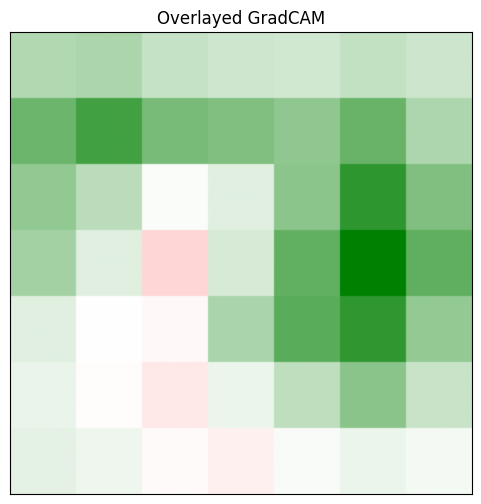

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Overlayed GradCAM'}>)

In [ ]:
# target class
target_class = 281  # Example: "tiger cat" class

# LayerGradCam object
layer_gc = LayerGradCam(model, model.layer4) # layer 4

# Generate the attribution
attribution = layer_gc.attribute(input_img, target=target_class)

# Visualize the attribution
upsampled_attr = LayerAttribution.interpolate(attribution, (224, 224))

viz.visualize_image_attr(upsampled_attr[0].cpu().permute(1, 2, 0).detach().numpy(),
                         sign="all",
                         title="Overlayed GradCAM")